This is a submission for the Kaggle Learn tutorial

In [2]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [3]:
housingData_filepath = "HousingData.csv"

housing_data = pd.read_csv(housingData_filepath)

housing_data


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


guide

- CRIM: Per capita crime rate by town
- ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
- INDUS: Proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: Nitric oxide concentration (parts per 10 million)
- RM: Average number of rooms per dwelling
- AGE: Proportion of owner-occupied units built prior to 1940
- DIS: Weighted distances to five Boston employment centers
- RAD: Index of accessibility to radial highways
- TAX: Full-value property tax rate per $10,000
- PTRATIO: Pupil-teacher ratio by town
- B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
- LSTAT: Percentage of lower status of the population
- MEDV: Median value of owner-occupied homes in $1000s

our target variable is `MEDV` ie prices of houses

In [4]:
housing_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
# check for null values 
housing_data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

Why would we want to use a heatmap on our data? our data contains 500 rows so it would be impossible to view them all.

but since we are staticians, lets use correlation matrix to view the correlation btwn the variables.
what is a correlation matrix?

this is a matrix that will help us view the relationship between pairs of variables. in our cae there is 169 possible pairs of relationships we can view.

note that

1 = strong positive relationship ie the variables move in the same direction eg if the pupil teacher ratio increases then the price increases

0 = weak relationship

-1 = strong negative relattionship eg if crime rate increases , the price decreases

<Axes: >

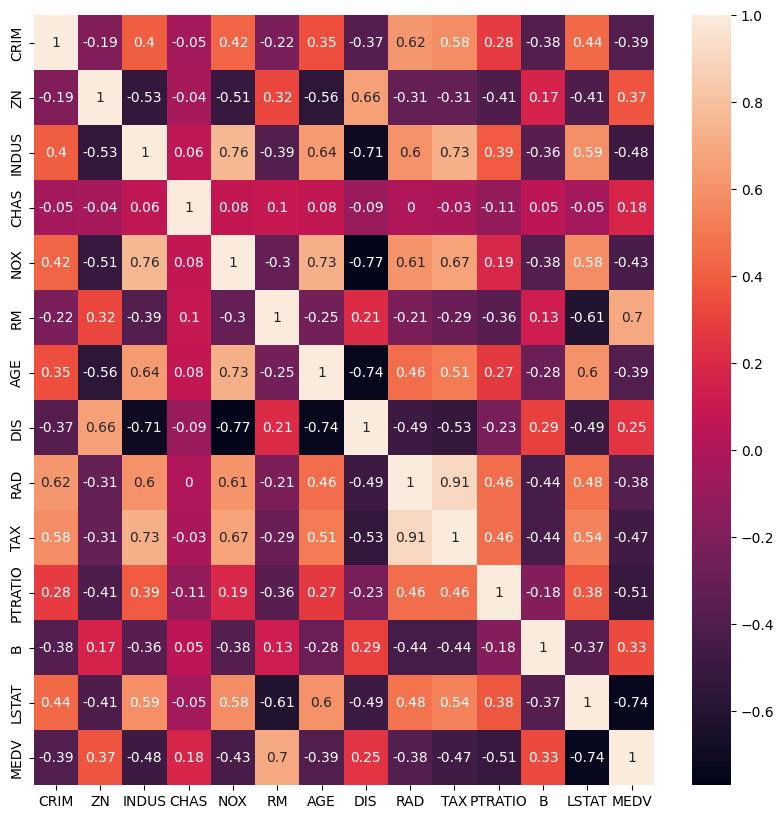

In [6]:
# building a correlation matrix using pandas
plt.figure(figsize=(10,10))
corr_matrix = housing_data.corr().round(2)

# Lets use a heatmap to view the correlation between the 13 variables
sns.heatmap(data=corr_matrix, annot=True)

The diagonal of oes indicates a strong positive correletion but dont be confused, this is the correlation betweeen a variable and itself.

checking the other data, the most strongly correlated is tax and rad ie taxation of property vs accessibility to highways while the most negative is nox/dix ie nitric oxide vs distance to boston employment centers. we can deduce that employment centers tend to be consructed where the nitric oxide concentration is low

lets view the distribution of prices using both histplot and kede oplot


<Axes: xlabel='MEDV', ylabel='Count'>

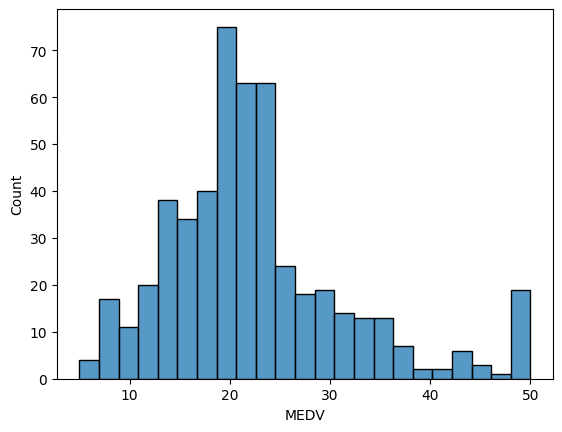

In [7]:
# histplot
sns.histplot(housing_data['MEDV'])

Text(35, 0.045, 'standard deviation=9.2')

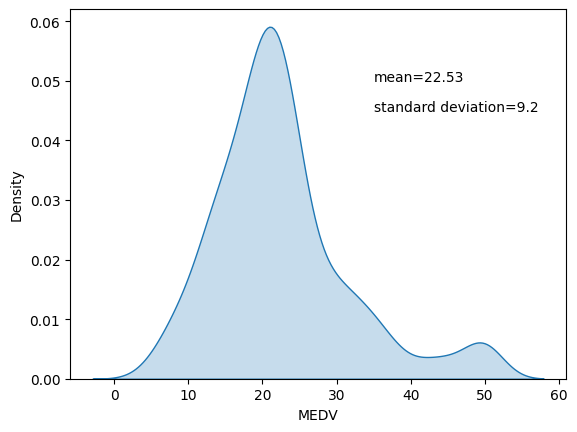

In [8]:
# kdeplot
graph = sns.kdeplot(data=housing_data['MEDV'], fill=True)

# calculate mean
mean_value = round(housing_data['MEDV'].mean(), 2)

# Calculate standard deviation
std_value = round(housing_data['MEDV'].std(),2)

graph.text(35,0.05,f'mean={mean_value}')
graph.text(35,0.045,f'standard deviation={std_value}')

as we can see, the graph follows a normal distribution of mean and standard deviation

lets use a swarmplot to check the accessibiliry to highways compared to prices

c:\Users\BM\Kaggle Learn\.venv\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 21.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\BM\Kaggle Learn\.venv\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 16.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\BM\Kaggle Learn\.venv\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 20.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='RAD', ylabel='MEDV'>

c:\Users\BM\Kaggle Learn\.venv\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 24.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\BM\Kaggle Learn\.venv\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 17.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\BM\Kaggle Learn\.venv\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 21.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


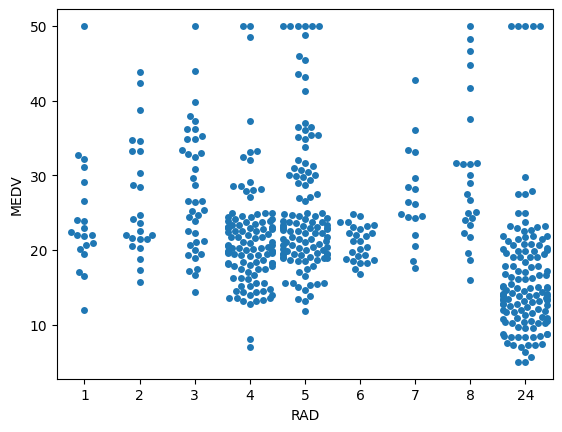

In [9]:
sns.swarmplot(x=housing_data['RAD'], y = housing_data['MEDV'])

C:\Users\BM\AppData\Local\Temp\ipykernel_10460\931300601.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(v, ax=axs[index], shade=True)
C:\Users\BM\AppData\Local\Temp\ipykernel_10460\931300601.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(v, ax=axs[index], shade=True)
C:\Users\BM\AppData\Local\Temp\ipykernel_10460\931300601.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(v, ax=axs[index], shade=True)
C:\Users\BM\AppData\Local\Temp\ipykernel_10460\931300601.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update 

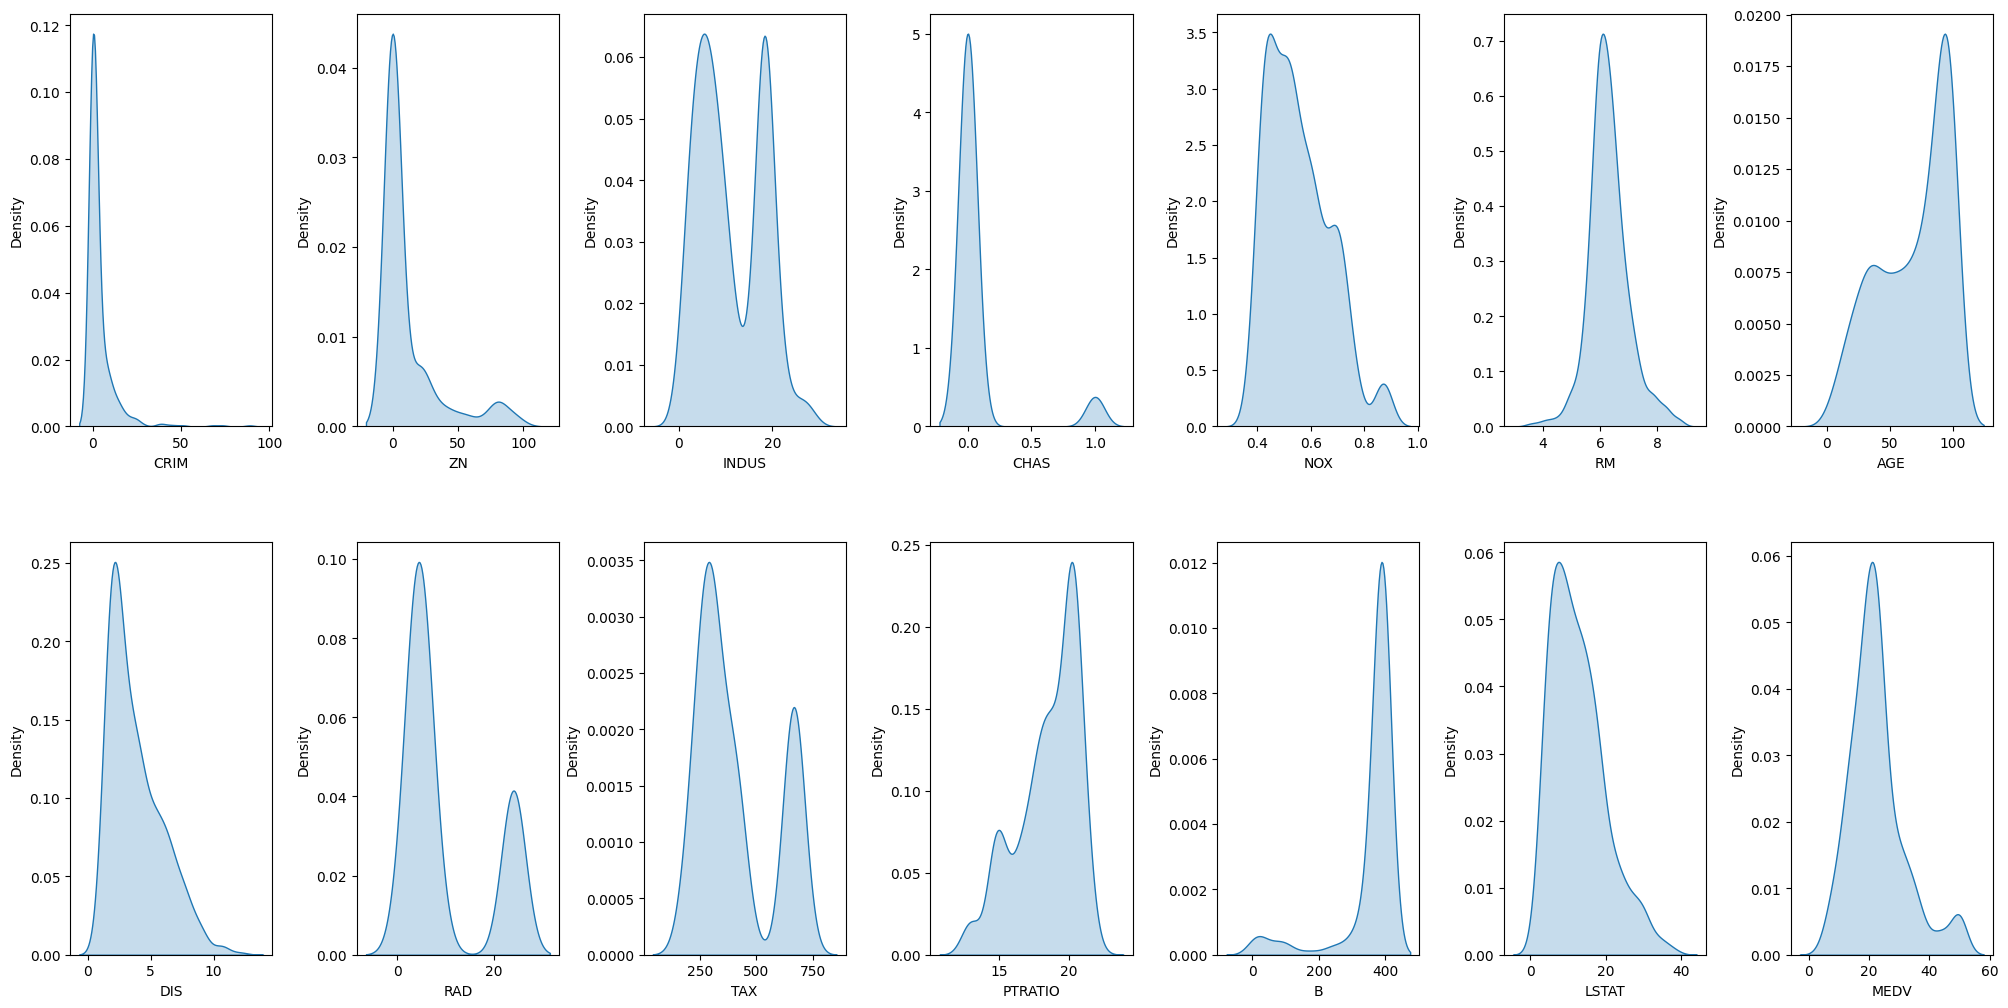

In [10]:
# craete subplots with 7 columns and 2 rows with a total size of 20*10 inches where fig is the figure and axs is the array
fig, axs = plt.subplots(nrows=2, ncols=7, figsize=(20,10))

# keep track of the Index
index = 0

# flatten the axc array to iterate over individual subplots into 1-D array making it easier to iterate over the subplots
axs = axs.flatten()

# iterate over each key(k)- value(v) pair in the data directory
for k, v in housing_data.items():

    # create a distribution plot for the current data
    sns.kdeplot(v, ax=axs[index], shade=True)

    # increment the index 
    index += 1

# Adjust spacing between plots
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

## visualizing relatonship between number of rooms and housing prices

<Axes: xlabel='MEDV', ylabel='RM'>

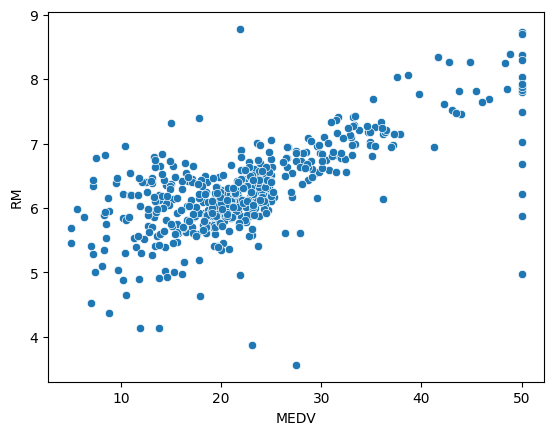

In [11]:
sns.scatterplot(x=housing_data['MEDV'], y=housing_data['RM'])

This pattern indicates that houses with a higher number of rooms tend to have higher prices within that range.The concentration of dots in a specific region can provide insights into the relationship between the variables being plotted. In this case, it suggests that there is a positive correlation between the number of rooms (RM) and housing prices (MEDV) within that particular range. This means that as the number of rooms increases, the price of the house tends to increase as well, within that range of values..

## using scatterplot with hue as distance from the highways

<Axes: xlabel='MEDV', ylabel='RM'>

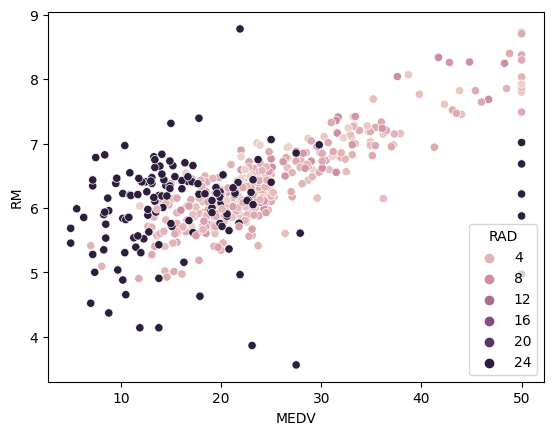

In [12]:
sns.scatterplot(x=housing_data['MEDV'], y=housing_data['RM'], hue=housing_data['RAD'])

Houses farther away from the highways tend to be cheaper: The scatter plot shows that as the distance to highways increases (higher RAD values), the housing prices (MEDV) tend to decrease. This suggests that houses located farther away from highways are generally more affordable compared to those closer to highways.

Houses with more rooms tend to be located closer to the highways: The scatter plot also reveals that houses with a higher number of rooms (RM) are more likely to be found closer to the highways (lower RAD values). This suggests that houses with larger sizes (more rooms) are often situated in areas that provide easier access to transportation routes, such as highways.

## comparing no of blacks with lower stat polpulation

<Axes: xlabel='PTRATIO', ylabel='LSTAT'>

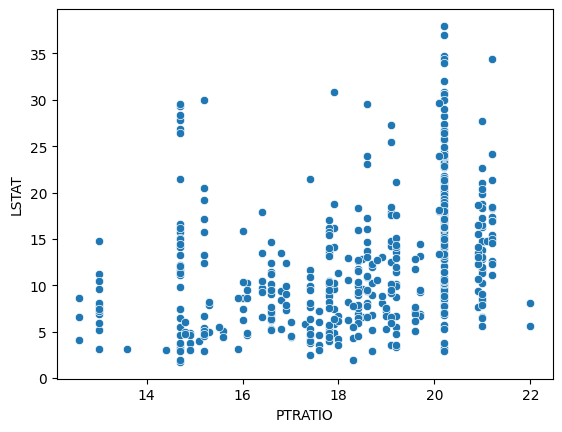

In [13]:
sns.scatterplot(x=housing_data['PTRATIO'], y=housing_data['LSTAT'])

In [14]:
housing_data['PTRATIO']

0      15.3
1      17.8
2      17.8
3      18.7
4      18.7
       ... 
501    21.0
502    21.0
503    21.0
504    21.0
505    21.0
Name: PTRATIO, Length: 506, dtype: float64

## Variable Comparison: Pupil-Teacher Ratio vs. Crime Rate (CRIM)

<Axes: xlabel='PTRATIO', ylabel='CRIM'>

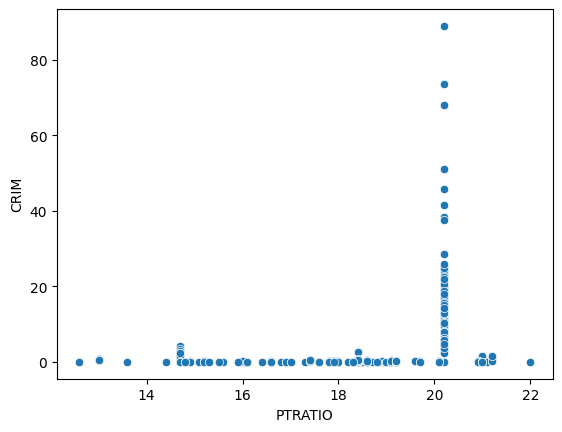

In [15]:
sns.scatterplot(x=housing_data['PTRATIO'], y=housing_data['CRIM'])

For most of the range of ptratio values (0-21), the crime rate appears to be relatively low, with many data points clustered around zero. This suggests that areas with lower pupil-teacher ratios tend to have lower crime rates. This observation aligns with the idea that a lower pupil-teacher ratio allows for more individual attention and supervision, which may create a more positive and supportive environment for students.

However, there is a distinct change in the pattern at ptratio = 21, where you observed a line of points indicating a sudden increase in the crime rate. This could imply that beyond this specific pupil-teacher ratio threshold, other factors come into play that contribute to an increase in criminal activities. These factors could include social and economic influences, neighborhood characteristics, or other community-specific dynamics.


## Analysis: Preference for Living in Old Buildings vs. Newer Buildings

Introduction:
The objective of this analysis is to investigate whether people generally prefer living in old buildings or newer buildings. The focus is to understand the housing preferences of individuals and determine if there is a discernible trend favoring one type of housing over the other.